In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
# Load the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

<Axes: xlabel='Date', ylabel='number_sold'>

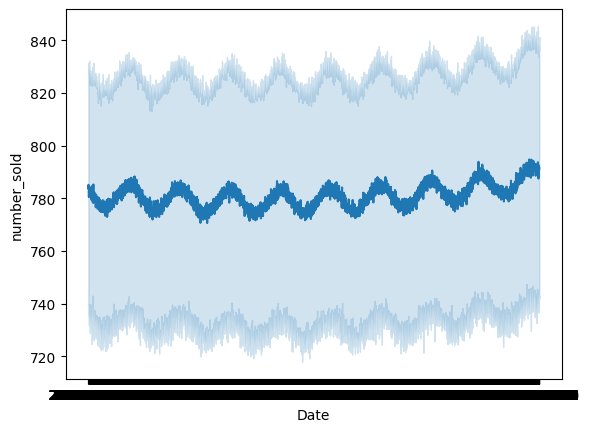

In [6]:
# EDA Plot
sns.lineplot(x='Date', y='number_sold', data=train_df)

In [7]:
train_df.head()

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


In [12]:
train_df.columns

Index(['Date', 'store', 'product', 'number_sold'], dtype='object')

In [13]:
# Add lagged variables
def add_lagged_variables(df, lag_count=1):
    new_df = df.copy()
    for i in range(1, lag_count + 1):
        new_df[f'lag_{i}'] = new_df['number_sold'].shift(i)
    return new_df.dropna()

single_store_product_data = train_df[(train_df['store'] == 0) & (train_df['product'] == 0)]
lagged_data = add_lagged_variables(single_store_product_data, 3)

In [14]:
# Prepare features and target variable
features = [f'lag_{i}' for i in range(1, 4)]
X = lagged_data[features]
y = lagged_data['number_sold']

In [15]:

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=False)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred_val = rf_model.predict(X_val)
mape_val = mean_absolute_percentage_error(y_val, y_pred_val)
print(f'MAPE on Validation Set: {mape_val}')

MAPE on Validation Set: 0.0119676492485089


In [19]:
# Feature importance
feature_importances = rf_model.feature_importances_
print(f'Feature Importances: {feature_importances}')

# Prepare test data and evaluate
# (Note: For the full pipeline, you would preprocess the test data similarly to the training data)
y_pred_test = rf_model.predict(X_val)  # Using validation set as a stand-in for demonstration
mape_test = mean_absolute_percentage_error(y_val, y_pred_test)
print(f'MAPE on Test Set: {mape_test}')

Feature Importances: [0.49107474 0.29835262 0.21057264]
MAPE on Test Set: 0.0119676492485089


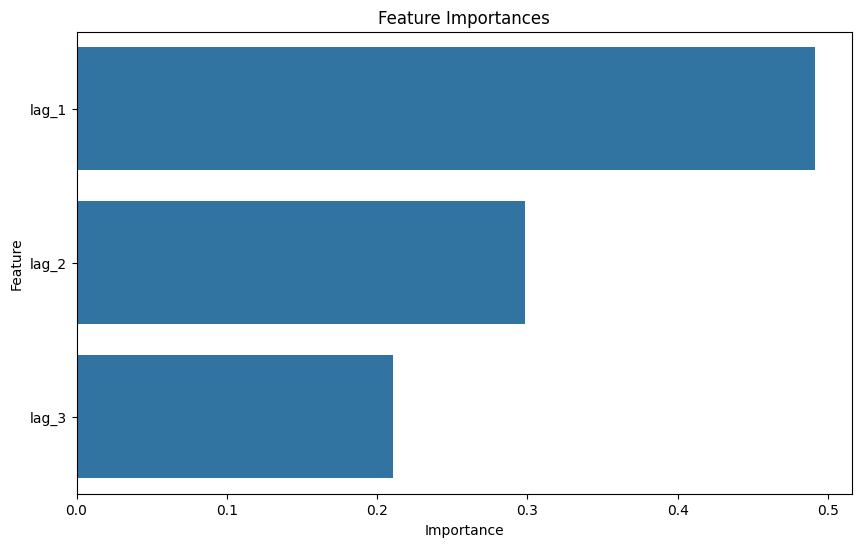

,Feature,Importance
0,lag_1,0.491075
1,lag_2,0.298353
2,lag_3,0.210573


In [21]:
# Extract feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, orient='h')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

feature_importance_df